In [5]:
import numpy as np
from skimage.measure import LineModelND
import matplotlib.pyplot as plt
N = 100
a = 2
b = 3
x = np.arange(1, N+1, 1)
y = a * x + b

# generate some noise
# noise = 20 * np.random.normal(size=x.size)
noise = 20 * np.random.normal(0, 50, size=x.size)
y_noise = noise + y

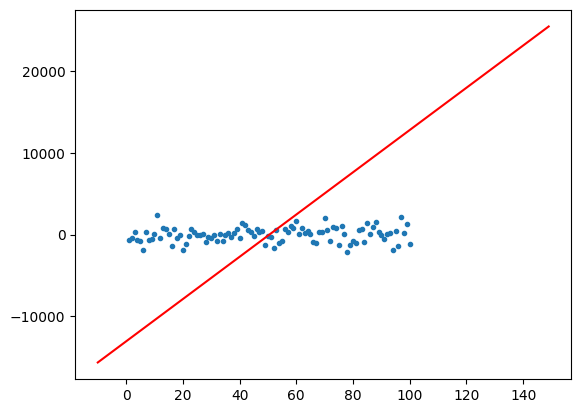

In [6]:
nd_model = LineModelND()
data = np.column_stack((x,y_noise))
nd_model.estimate(data)
ans_x = np.arange(-10, N+50, 1)
ans_y = nd_model.predict_y(ans_x)
plt.plot(x, y_noise, '.')
plt.plot(ans_x, ans_y, 'r-', label='')

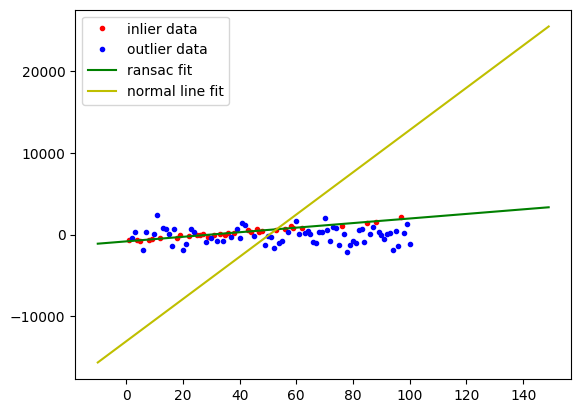

In [7]:
from skimage.measure import ransac

ransac_model, inliers = ransac(data, LineModelND, min_samples=2, residual_threshold=10, max_trials=1000)
outliers = (inliers == False)

yy = ransac_model.predict_y(ans_x)
fig, ax = plt.subplots()
ax.plot(data[inliers, 0], data[inliers, 1], '.r', label='inlier data')
ax.plot(data[outliers, 0], data[outliers, 1], '.b', label='outlier data')
ax.plot(ans_x, yy, 'g-', label='ransac fit')
ax.plot(ans_x, ans_y, 'y-', label="normal line fit")
plt.legend()
plt.show()